In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os


In [2]:
transform = transforms.Compose(
    [transforms.Resize((128, 128)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


In [3]:
import torchvision.transforms as transforms
import torch.utils.data as data
from torchvision.datasets import ImageFolder

# ścieżki do folderów z danymi
train_dir = "./obrazki/"
test_dir = "./obrazki/"

# transformacje dla obrazków (normalizacja, przekształcenie do tensorów)
transform = transforms.Compose(
    [transforms.Resize((128,128)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# wczytanie danych treningowych
train_data = ImageFolder(root=train_dir, transform=transform)
train_loader = data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

# wczytanie danych testowych
test_data = ImageFolder(root=test_dir, transform=transform)
test_loader = data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)


In [4]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = torch.nn.Linear(64 * 16 * 16, 512)
        self.fc2 = torch.nn.Linear(512, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 16 * 16)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

net = Net()


In [5]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = torch.nn.Linear(64 * 16 * 16, 512)
        self.fc2 = torch.nn.Linear(512, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 16 * 16)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return x

net = Net()


In [6]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


[Epoch 1] Train Loss: 1.876 | Train Acc: 0.305 | Test Loss: 1.536 | Test Acc: 0.421
[Epoch 2] Train Loss: 1.483 | Train Acc: 0.447 | Test Loss: 1.287 | Test Acc: 0.497
[Epoch 3] Train Loss: 1.298 | Train Acc: 0.489 | Test Loss: 1.238 | Test Acc: 0.517
[Epoch 4] Train Loss: 1.159 | Train Acc: 0.531 | Test Loss: 1.021 | Test Acc: 0.577
[Epoch 5] Train Loss: 1.106 | Train Acc: 0.543 | Test Loss: 1.097 | Test Acc: 0.556
[Epoch 6] Train Loss: 1.092 | Train Acc: 0.547 | Test Loss: 1.156 | Test Acc: 0.541
[Epoch 7] Train Loss: 1.041 | Train Acc: 0.573 | Test Loss: 0.974 | Test Acc: 0.562
[Epoch 8] Train Loss: 0.978 | Train Acc: 0.577 | Test Loss: 0.958 | Test Acc: 0.581
[Epoch 9] Train Loss: 0.942 | Train Acc: 0.590 | Test Loss: 0.916 | Test Acc: 0.577
[Epoch 10] Train Loss: 0.909 | Train Acc: 0.581 | Test Loss: 0.907 | Test Acc: 0.577


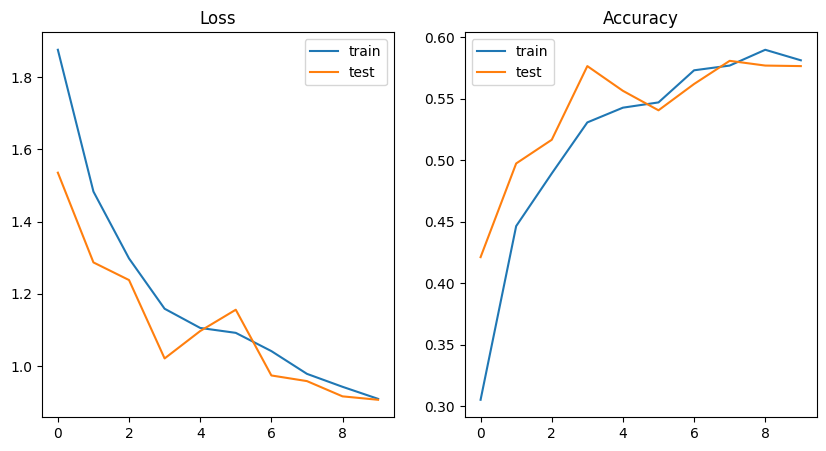

In [7]:

import matplotlib.pyplot as plt

train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    test_loss = running_loss / len(test_loader)
    test_acc = correct / total
    test_loss_history.append(test_loss)
    test_acc_history.append(test_acc)

    print('[Epoch %d] Train Loss: %.3f | Train Acc: %.3f | Test Loss: %.3f | Test Acc: %.3f' %
          (epoch + 1, train_loss, train_acc, test_loss, test_acc))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_loss_history,label='train')
plt.plot(test_loss_history,label='test')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc_history,label='train')
plt.plot(test_acc_history,label='test')
plt.title('Accuracy')
plt.legend()
plt.show()


In [8]:
correct = 0
total = 0 
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()

print('Accuracy of the network on 1000 test images: %d %%' %(100*correct/total))

Accuracy of the network on 1000 test images: 60 %


In [9]:
# przygotowanie pustej listy na etykiety klas
classes = []
data_dir = './obrazki/'
for folder in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, folder)):
        classes.append(folder)

# inicjalizacja liczników TP, FP, TN, FN
tp = torch.zeros(len(classes))
fp = torch.zeros(len(classes))
tn = torch.zeros(len(classes))
fn = torch.zeros(len(classes))

# obliczanie TP, FP, TN, FN dla każdej klasy
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(len(classes)):
            tp[i] += ((predicted == i) & (labels == i)).sum().item()
            fp[i] += ((predicted == i) & (labels != i)).sum().item()
            tn[i] += ((predicted != i) & (labels != i)).sum().item()
            fn[i] += ((predicted != i) & (labels == i)).sum().item()

# obliczanie precyzji, czułości, specyficzności i F1-score dla każdej klasy
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * precision * recall / (precision + recall)

# wyświetlanie wyników w postaci tabeli
print('{:<15s} {:<10s} {:<10s} {:<10s} {:<10s}'.format('', 'Precision', 'Recall', 'Specificity', 'F1-Score'))
for i, class_name in enumerate(classes):
    print('{:<15s} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}'.format(class_name, precision[i], recall[i], specificity[i], f1_score[i]))


                Precision  Recall     Specificity F1-Score  
apple           0.28       0.94       0.77       0.43      
blueberry       0.51       0.74       0.89       0.60      
cherry          0.52       0.62       0.95       0.56      
corn            0.75       0.56       0.97       0.64      
grape           0.85       0.53       0.99       0.65      
peach           0.93       0.51       1.00       0.66      
potato          0.86       0.49       1.00       0.62      
potatosick      0.96       0.46       1.00       0.62      
strawberry      0.80       0.55       0.99       0.65      
tomato          0.97       0.50       1.00       0.66      
